# Practical Example

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
raw_data = pd.read_csv('1.04. Real-life example.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Dealing with missing values

In [4]:
data = raw_data
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [5]:
data_no_mv = data.dropna(axis=0)

In [6]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000,4025
unique,7,NaN,6,NaN,NaN,4,2,NaN,306
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN,188
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627,NaN
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Exploring the PDFs

C:\Users\dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


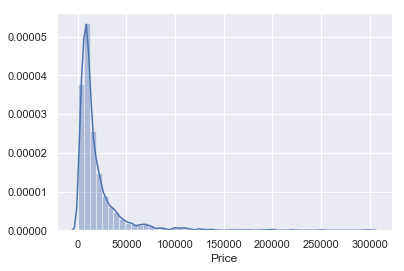

In [7]:
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [88]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000,3984
unique,7,NaN,6,NaN,NaN,4,2,NaN,302
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN,188
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922,NaN
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000,NaN
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000,NaN
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000,NaN


C:\Users\dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


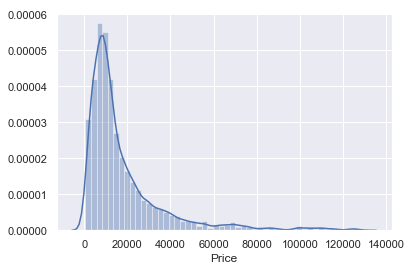

In [89]:
sns.distplot(data_1['Price'])

C:\Users\dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


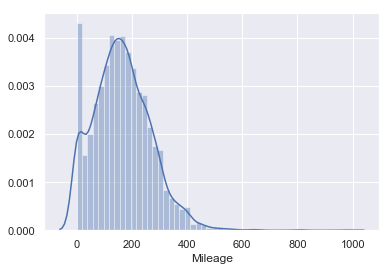

In [10]:
sns.distplot(data_1['Mileage'])

In [11]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

C:\Users\dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


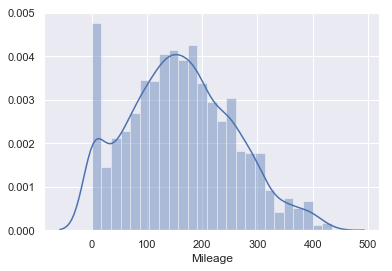

In [12]:
sns.distplot(data_2['Mileage'])

C:\Users\dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


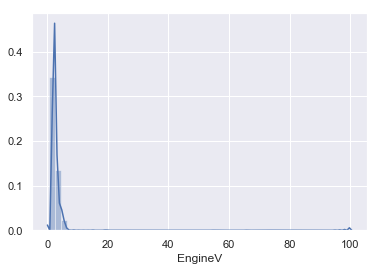

In [13]:
sns.distplot(data_2['EngineV'])

In [14]:
data_3 = data_2[data_2['EngineV'] < 6.5]

C:\Users\dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


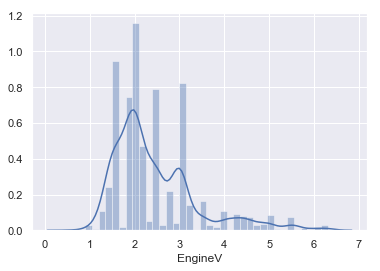

In [15]:
sns.distplot(data_3['EngineV'])

C:\Users\dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


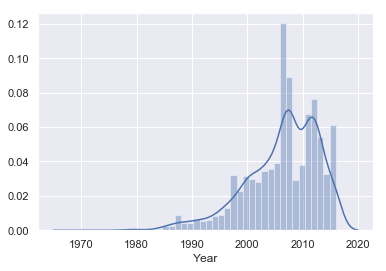

In [16]:
sns.distplot(data_3['Year'])

In [17]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

C:\Users\dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


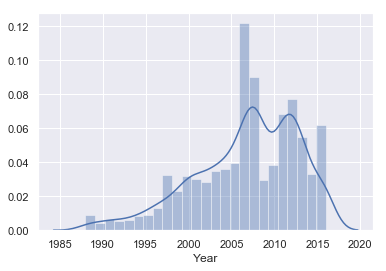

In [18]:
sns.distplot(data_4['Year'])

In [19]:
data_cleaned = data_4.reset_index(drop=True)

In [20]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000,3867
unique,7,NaN,6,NaN,NaN,4,2,NaN,291
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN,181
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853,NaN
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870,NaN
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000,NaN
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000,NaN


## Checking OLS assumptions

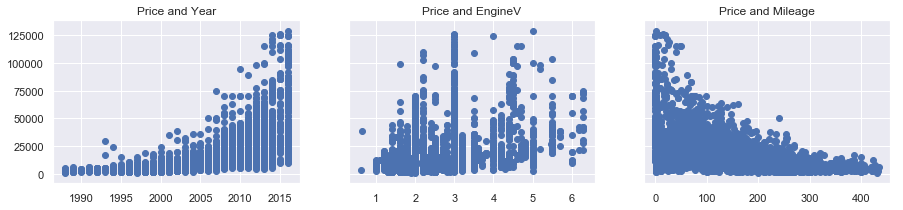

In [21]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')

ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')

ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()


### Relaxing assumptions

In [22]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned 

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model,log_price
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320,8.342840
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500,9.495519
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7,10.043249
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4,9.814656
5,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6,9.560997
6,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane,9.287209
7,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV,7.244228
8,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,Megane,9.388487
9,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994,19,7.824046


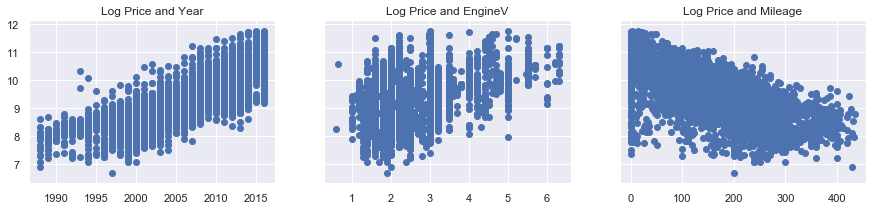

In [23]:
f, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Log Price and Year')

ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Log Price and EngineV')

ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Log Price and Mileage')

plt.show()


In [24]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicollinearity

In [25]:
data_cleaned.columns.values 

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'Model', 'log_price'], dtype=object)

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [27]:
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [28]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

## Create dummy variables

In [29]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [30]:
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,2.00,8.342840,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,427,2.90,8.974618,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,358,5.00,9.495519,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,240,4.20,10.043249,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,120,2.00,9.814656,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,200,2.70,9.560997,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,193,1.50,9.287209,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,212,1.80,7.244228,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,177,1.50,9.388487,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,260,1.79,7.824046,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Rechecking the multicollinearity

In [ ]:
variables = data_with_dummies.drop(['log_price'],axis=1)
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns

In [ ]:
vif

### Rearrange a bit

In [31]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_73

In [34]:
cols = ['log_price','Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes',
       'Model_100', 'Model_11', 'Model_116', 'Model_118', 'Model_120',
       'Model_19', 'Model_190', 'Model_200', 'Model_210', 'Model_220',
       'Model_230', 'Model_25', 'Model_250', 'Model_300', 'Model_316',
       'Model_318', 'Model_320', 'Model_323', 'Model_325', 'Model_328',
       'Model_330', 'Model_335', 'Model_4 Series Gran Coupe', 'Model_428',
       'Model_4Runner', 'Model_5 Series', 'Model_5 Series GT',
       'Model_520', 'Model_523', 'Model_524', 'Model_525', 'Model_528',
       'Model_530', 'Model_535', 'Model_540', 'Model_545', 'Model_550',
       'Model_6 Series Gran Coupe', 'Model_630', 'Model_640', 'Model_645',
       'Model_650', 'Model_730', 'Model_735', 'Model_740', 'Model_745',
       'Model_750', 'Model_760', 'Model_80', 'Model_9', 'Model_90',
       'Model_A 140', 'Model_A 150', 'Model_A 170', 'Model_A 180',
       'Model_A1', 'Model_A3', 'Model_A4', 'Model_A4 Allroad', 'Model_A5',
       'Model_A6', 'Model_A6 Allroad', 'Model_A7', 'Model_A8',
       'Model_ASX', 'Model_Amarok', 'Model_Auris', 'Model_Avalon',
       'Model_Avensis', 'Model_Aygo', 'Model_B 170', 'Model_B 180',
       'Model_B 200', 'Model_Beetle', 'Model_Bora', 'Model_C-Class',
       'Model_CL 180', 'Model_CL 500', 'Model_CL 55 AMG', 'Model_CL 550',
       'Model_CL 63 AMG', 'Model_CLA 200', 'Model_CLA 220',
       'Model_CLA-Class', 'Model_CLC 180', 'Model_CLC 200',
       'Model_CLK 200', 'Model_CLK 220', 'Model_CLK 230', 'Model_CLK 240',
       'Model_CLK 280', 'Model_CLK 320', 'Model_CLK 430', 'Model_CLS 350',
       'Model_CLS 400', 'Model_CLS 500', 'Model_CLS 63 AMG',
       'Model_Caddy', 'Model_Camry', 'Model_Captur', 'Model_Caravelle',
       'Model_Carina', 'Model_Carisma', 'Model_Celica', 'Model_Clio',
       'Model_Colt', 'Model_Corolla', 'Model_Corolla Verso',
       'Model_Cross Touran', 'Model_Dokker', 'Model_Duster',
       'Model_E-Class', 'Model_Eclipse', 'Model_Eos', 'Model_Espace',
       'Model_FJ Cruiser', 'Model_Fluence', 'Model_Fortuner',
       'Model_G 320', 'Model_G 350', 'Model_G 500', 'Model_G 55 AMG',
       'Model_G 63 AMG', 'Model_GL 320', 'Model_GL 350', 'Model_GL 420',
       'Model_GL 450', 'Model_GL 500', 'Model_GL 550', 'Model_GLC-Class',
       'Model_GLE-Class', 'Model_GLK 220', 'Model_GLK 300',
       'Model_GLS 350', 'Model_GLS 400', 'Model_Galant', 'Model_Golf GTI',
       'Model_Golf II', 'Model_Golf III', 'Model_Golf IV',
       'Model_Golf Plus', 'Model_Golf V', 'Model_Golf VI',
       'Model_Golf VII', 'Model_Golf Variant', 'Model_Grand Scenic',
       'Model_Grandis', 'Model_Hiace', 'Model_Highlander', 'Model_Hilux',
       'Model_I3', 'Model_IQ', 'Model_Jetta', 'Model_Kangoo',
       'Model_Koleos', 'Model_L 200', 'Model_LT', 'Model_Laguna',
       'Model_Lancer', 'Model_Lancer Evolution', 'Model_Lancer X',
       'Model_Lancer X Sportback', 'Model_Land Cruiser 100',
       'Model_Land Cruiser 105', 'Model_Land Cruiser 200',
       'Model_Land Cruiser 76', 'Model_Land Cruiser 80',
       'Model_Land Cruiser Prado', 'Model_Latitude', 'Model_Logan',
       'Model_Lupo', 'Model_M5', 'Model_M6', 'Model_MB', 'Model_ML 250',
       'Model_ML 270', 'Model_ML 280', 'Model_ML 320', 'Model_ML 350',
       'Model_ML 400', 'Model_ML 430', 'Model_ML 500', 'Model_ML 550',
       'Model_ML 63 AMG', 'Model_Master', 'Model_Matrix', 'Model_Megane',
       'Model_Modus', 'Model_Multivan', 'Model_New Beetle',
       'Model_Outlander', 'Model_Outlander XL', 'Model_Pajero',
       'Model_Pajero Pinin', 'Model_Pajero Sport', 'Model_Pajero Wagon',
       'Model_Passat B3', 'Model_Passat B4', 'Model_Passat B5',
       'Model_Passat B6', 'Model_Passat B7', 'Model_Passat B8',
       'Model_Passat CC', 'Model_Phaeton', 'Model_Pointer', 'Model_Polo',
       'Model_Previa', 'Model_Prius', 'Model_Q3', 'Model_Q5', 'Model_Q7',
       'Model_R 320', 'Model_R8', 'Model_Rav 4', 'Model_S 140',
       'Model_S 250', 'Model_S 300', 'Model_S 320', 'Model_S 350',
       'Model_S 400', 'Model_S 430', 'Model_S 500', 'Model_S 550',
       'Model_S 600', 'Model_S 63 AMG', 'Model_S 65 AMG', 'Model_S4',
       'Model_S5', 'Model_S8', 'Model_SL 500 (550)', 'Model_SL 55 AMG',
       'Model_SLK 200', 'Model_SLK 350', 'Model_Sandero',
       'Model_Sandero StepWay', 'Model_Scenic', 'Model_Scion',
       'Model_Scirocco', 'Model_Sequoia', 'Model_Sharan', 'Model_Sienna',
       'Model_Smart', 'Model_Space Star', 'Model_Space Wagon',
       'Model_Sprinter 208', 'Model_Sprinter 210', 'Model_Sprinter 211',
       'Model_Sprinter 212', 'Model_Sprinter 213', 'Model_Sprinter 311',
       'Model_Sprinter 312', 'Model_Sprinter 313', 'Model_Sprinter 315',
       'Model_Sprinter 316', 'Model_Sprinter 318', 'Model_Sprinter 319',
       'Model_Symbol', 'Model_Syncro', 'Model_T3 (Transporter)',
       'Model_T4 (Transporter)', 'Model_T4 (Transporter) ',
       'Model_T5 (Transporter)', 'Model_T5 (Transporter) ',
       'Model_T6 (Transporter)', 'Model_T6 (Transporter) ', 'Model_TT',
       'Model_Tacoma', 'Model_Tiguan', 'Model_Touareg', 'Model_Touran',
       'Model_Trafic', 'Model_Tundra', 'Model_Up', 'Model_V 250',
       'Model_Vaneo', 'Model_Vento', 'Model_Venza', 'Model_Viano',
       'Model_Virage', 'Model_Vista', 'Model_Vito', 'Model_X1',
       'Model_X3', 'Model_X5', 'Model_X5 M', 'Model_X6', 'Model_X6 M',
       'Model_Yaris', 'Model_Z3', 'Model_Z4']

In [35]:
data_preprocessed =  data_with_dummies[cols]
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,8.342840,277,2.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8.974618,427,2.90,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9.495519,358,5.00,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.043249,240,4.20,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9.814656,120,2.00,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,9.560997,200,2.70,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9.287209,193,1.50,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,7.244228,212,1.80,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,9.388487,177,1.50,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,7.824046,260,1.79,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Linear regression model

### Declare the inputs and the targets

In [36]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

### Scale the data

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [39]:
inputs_scaled = scaler.transform(inputs)

In [40]:
inputs_scaled

array([[ 1.2179077 , -0.47452478,  2.27971827, ..., -0.06027879,
        -0.01608307, -0.03598147],
       [ 2.78660201,  0.47359854, -0.43865069, ..., -0.06027879,
        -0.01608307, -0.03598147],
       [ 2.06500263,  2.68588629, -0.43865069, ..., -0.06027879,
        -0.01608307, -0.03598147],
       ...,
       [-1.58482613,  0.57894557, -0.43865069, ..., -0.06027879,
        -0.01608307, -0.03598147],
       [-1.66848982,  1.10568075,  2.27971827, ..., -0.06027879,
        -0.01608307, -0.03598147],
       [-0.38216049, -0.47452478, -0.43865069, ..., -0.06027879,
        -0.01608307, -0.03598147]])

### Train Test Split

In [41]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365  )

### Create the regression

In [42]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
y_hat = reg.predict(x_train)

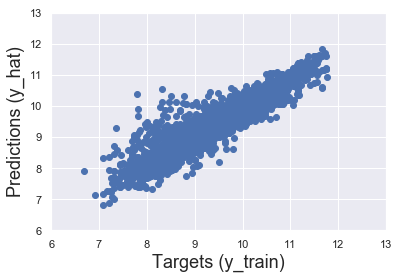

In [44]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\dell\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5,1,'Risiduals PDF')

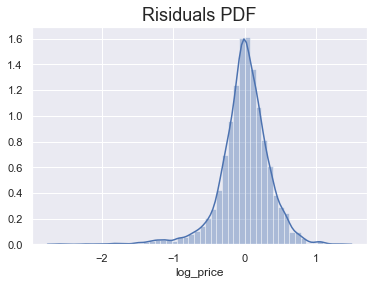

In [45]:
sns.distplot(y_train-y_hat)
plt.title('Risiduals PDF', size=18)

In [93]:
reg.score(x_train, y_train)

0.8399990143138187

In [94]:
#calculating mse
mse = np.mean((y_hat - y_train)**2)
mse

0.12109931946816434

### R-squared Adjusted

In [47]:
r2 = reg.score(x_train, y_train)
n,p = x_train.shape
adjusted_r2 = 1- (1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8223615627498483

### Finding the weights and bias

In [48]:
reg.coef_

array([-3.61106043e-01,  2.61906285e-02, -9.75873612e+11, -1.05152857e+12,
       -3.00857981e+12,  5.34094150e+12, -1.59815181e+12,  3.36658520e+12,
       -5.94934251e-02, -1.61132812e-02, -6.51245117e-02, -5.41992188e-02,
       -1.90429688e-02, -9.99755859e-02, -2.43225098e-02, -1.17187500e-01,
        3.12988281e-01, -1.64898450e+11, -4.01829162e+12,  3.51333618e-02,
        3.51676941e-02, -1.19018555e-02, -4.45794340e+11,  1.48925781e-02,
        1.66587830e-02,  1.18865967e-02,  2.65350342e-02,  1.06811523e-02,
       -3.15264978e+11,  9.62829590e-03, -2.71224976e-03,  2.09579468e-02,
        5.72242737e-02,  1.11923218e-01, -7.14395491e+12,  2.56958008e-02,
        3.36303711e-02,  4.93774414e-02, -2.84571149e+12,  2.58331299e-02,
        2.49938965e-02,  1.30407254e+12,  2.58789062e-02,  4.30297852e-02,
        1.64642334e-01,  5.40771484e-02,  6.10683939e+12,  7.29675293e-02,
        6.26831055e-02,  1.08398438e-01,  8.07495117e-02,  2.85339355e-02,
        9.50955648e+12,  

In [49]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-3.611060e-01
1,EngineV,2.619063e-02
2,Brand_BMW,-9.758736e+11
3,Brand_Mercedes-Benz,-1.051529e+12
4,Brand_Mitsubishi,-3.008580e+12
5,Brand_Renault,5.340942e+12
6,Brand_Toyota,-1.598152e+12
7,Brand_Volkswagen,3.366585e+12
8,Body_hatch,-5.949343e-02
9,Body_other,-1.611328e-02


## Testing

In [91]:
y_hat_test = reg.predict(x_test)
#calculating mse
mse = np.mean((y_hat_test - y_test)**2)
mse

1.9737516608596578e+27

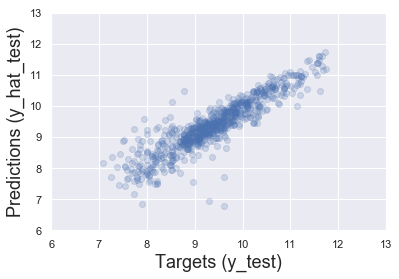

In [63]:
plt.scatter(y_test,y_hat_test, alpha = 0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [64]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predictions'])
df_pf.head()

,Predictions
0,1.043382e+04
1,inf
2,4.861663e+03
3,7.129157e+03
4,1.145791e+04


In [65]:
y_test = y_test.reset_index(drop=True)
df_pf['Target'] = np.exp(y_test)
df_pf.head()

,Predictions,Target
0,1.043382e+04,2300.0
1,inf,2800.0
2,4.861663e+03,2500.0
3,7.129157e+03,6400.0
4,1.145791e+04,9150.0


In [66]:
df_pf['Risidual'] = df_pf['Target'] - df_pf['Predictions']

In [67]:
df_pf['Difference %'] = np.absolute(df_pf['Risidual']/df_pf['Target']*100)

In [70]:
df_pf.head()

,Predictions,Target,Risidual,Difference %
0,1.043382e+04,2300.0,-8133.818801,353.644296
1,inf,2800.0,-inf,inf
2,4.861663e+03,2500.0,-2361.662527,94.466501
3,7.129157e+03,6400.0,-729.156776,11.393075
4,1.145791e+04,9150.0,-2307.909389,25.223053


In [71]:
df_pf.describe()

,Predictions,Target,Risidual,Difference %
count,7.740000e+02,774.000000,7.740000e+02,774.000000
mean,inf,18165.817106,-inf,inf
std,NaN,19967.858908,NaN,NaN
min,0.000000e+00,1200.000000,-inf,0.072661
25%,7.138525e+03,6900.000000,-1.978698e+03,8.671652
50%,1.138402e+04,11600.000000,1.399646e+02,19.608731
75%,2.039230e+04,20500.000000,2.267143e+03,36.243060
max,inf,126000.000000,7.613386e+04,inf


In [72]:
df_pf.sort_values(by=['Difference %'])

,Predictions,Target,Risidual,Difference %
97,2.701962e+03,2700.0,-1.961848e+00,0.072661
714,2.296269e+04,22999.0,3.631063e+01,0.157879
622,4.207418e+03,4200.0,-7.418233e+00,0.176625
115,8.820544e+03,8800.0,-2.054437e+01,0.233459
637,3.987504e+04,40000.0,1.249594e+02,0.312398
188,1.093455e+04,10900.0,-3.454822e+01,0.316956
509,7.227295e+03,7200.0,-2.729505e+01,0.379098
606,2.712611e+04,27000.0,-1.261084e+02,0.467068
740,6.218161e+03,6250.0,3.183894e+01,0.509423
439,1.790302e+04,17800.0,-1.030185e+02,0.578756


In [75]:
df_pf.drop([555,548,366,681,625,660,264,210,67,6,1,412],axis=0).sort_values(by=['Difference %']).describe()

,Predictions,Target,Risidual,Difference %
count,762.000000,762.000000,762.000000,762.000000
mean,16560.907501,18147.085879,1586.178378,30.304247
std,16511.922185,19993.280986,8123.067680,43.767106
min,0.000000,1200.000000,-28578.091165,0.072661
25%,7125.242047,6900.000000,-1830.282632,8.540367
50%,11247.965726,11650.000000,173.317897,19.199779
75%,19820.488836,20500.000000,2310.852689,34.734134
max,125690.416225,126000.000000,76133.864512,439.662941


## Feature Selection

In [85]:
from sklearn.feature_selection import f_regression
f_regression(inputs,targets)
p_values = f_regression(inputs,targets)[1]
reg_summary = pd.DataFrame(data=inputs.columns.values,columns=['Features'])
reg_summary['Coeficients'] = reg.coef_
reg_summary['p-values'] = p_values.round(3)
reg_summary.sort_values(by=['p-values'])

,Features,Coeficients,p-values
0,Mileage,-3.611060e-01,0.000
205,Model_Multivan,-7.739128e+11,0.000
213,Model_Passat B3,-6.706636e+11,0.000
214,Model_Passat B4,-6.245159e+11,0.000
215,Model_Passat B5,-1.266037e+12,0.000
77,Model_A6,-5.171237e+11,0.000
76,Model_A5,-1.648985e+11,0.000
74,Model_A4,-3.112849e+11,0.000
141,Model_GL 350,9.484863e-02,0.000
226,Model_Q5,-1.593277e+11,0.000


## Regularisation

### Ridge Regression

In [252]:
from sklearn.linear_model import Ridge
## training the model
ridgeReg = Ridge(alpha=0.000001, normalize=True)



In [253]:
ridgeReg.fit(x_train,y_train)

Ridge(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [254]:
y_hat = ridgeReg.predict(x_train)
#calculating mse
mse = np.mean((y_hat - y_train)**2)
mse

0.11971923409985923

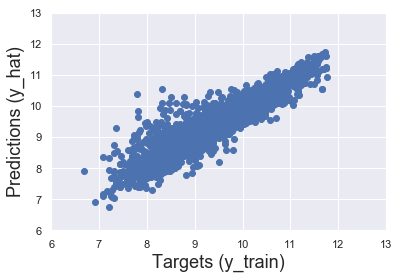

In [255]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [256]:
y_hat_test = ridgeReg.predict(x_test)
#calculating mse
mse = np.mean((y_hat_test - y_test)**2)
mse


0.3874361414963009

In [257]:
#calculating R-squared Adjusted
r2 = ridgeReg.score(x_train, y_train)
n,p = x_train.shape
adjusted_r2 = 1- (1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8243859854235197

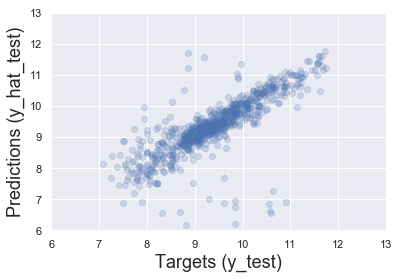

In [258]:
plt.scatter(y_test,y_hat_test, alpha = 0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

### Lasso Regression

In [259]:
from sklearn.linear_model import Lasso

In [260]:
lassoReg = Lasso(alpha=0.000001, normalize=True, max_iter=100000)
lassoReg.fit(x_train,y_train)

Lasso(alpha=1e-06, copy_X=True, fit_intercept=True, max_iter=100000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [261]:
y_hat = lassoReg.predict(x_train)
# calculating mse
mse = np.mean((y_hat - y_train)**2)
mse

0.1198537944632485

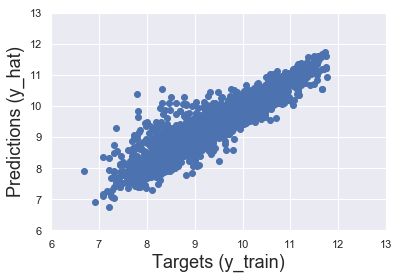

In [262]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [263]:
y_hat_test = lassoReg.predict(x_test)
#calculating mse
mse = np.mean((y_hat_test - y_test)**2)
mse

0.16498043350845987

In [264]:
#calculating R-squared Adjusted
r2 = lassoReg.score(x_train, y_train)
n,p = x_train.shape
adjusted_r2 = 1- (1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8241886012204269

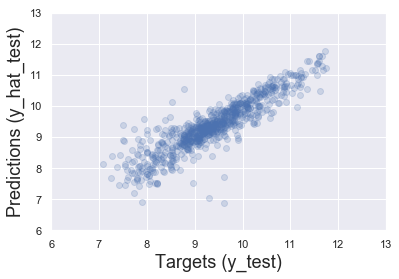

In [265]:
plt.scatter(y_test,y_hat_test, alpha = 0.2)
plt.xlabel('Targets (y_test)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()